In [63]:
# general
import os

# data manipulation
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import numpy

# preprocessing
from sklearn.preprocessing import RobustScaler

# feature selection

# model selection
from sklearn.model_selection import train_test_split

# modeling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# validation
from sklearn.metrics import mean_absolute_error, mean_squared_log_error
from sklearn.model_selection import cross_validate, cross_val_score

# hyperparameter optimization
from skopt import BayesSearchCV
from skopt import gp_minimize
from skopt.space import Real, Integer, Categorical
from skopt.utils import use_named_args
from geneticalgorithm import geneticalgorithm as ga
import pygad

# visualization
from matplotlib import pyplot as plt
from skopt.plots import plot_convergence

%matplotlib inline

In [3]:
def skot_hyperopt(space, model, x, y):
    @use_named_args(space)
    def objective(**params):
        model.set_params(**params)

        return -np.mean(cross_val_score(model, x, y, cv=5, n_jobs=-1,
                                        scoring="accuracy"))
    res_gp = gp_minimize(objective, space, n_calls=50, random_state=0)
    return res_gp

In [159]:
data = load_iris()
x = pd.DataFrame(data['data'], 
                 columns=data['feature_names'])
y = data['target']

In [168]:
xtrn

array([[5. , 2.3, 3.3, 1. ],
       [5.5, 4.2, 1.4, 0.2],
       [5.4, 3. , 4.5, 1.5],
       [6.3, 3.3, 6. , 2.5],
       [6.3, 2.5, 4.9, 1.5],
       [6.3, 2.8, 5.1, 1.5],
       [5. , 3.5, 1.3, 0.3],
       [6.1, 2.9, 4.7, 1.4],
       [5.1, 3.8, 1.5, 0.3],
       [6.1, 2.8, 4. , 1.3],
       [5.9, 3. , 4.2, 1.5],
       [5.6, 2.5, 3.9, 1.1],
       [5.4, 3.9, 1.3, 0.4],
       [6.3, 2.7, 4.9, 1.8],
       [4.6, 3.4, 1.4, 0.3],
       [5.7, 2.9, 4.2, 1.3],
       [5.8, 2.8, 5.1, 2.4],
       [4.6, 3.1, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [6. , 2.2, 5. , 1.5],
       [6.5, 3.2, 5.1, 2. ],
       [5.6, 3. , 4.5, 1.5],
       [5.4, 3.9, 1.7, 0.4],
       [7.2, 3.2, 6. , 1.8],
       [5.8, 2.7, 4.1, 1. ],
       [6.9, 3.1, 4.9, 1.5],
       [6.3, 2.5, 5. , 1.9],
       [4.4, 3.2, 1.3, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.5, 2.3, 1.3, 0.3],
       [6.2, 2.2, 4.5, 1.5],
       [4.3, 3. , 1.1, 0.1],
       [6.1, 2.6, 5.6, 1.4],
       [7.7, 3. , 6.1, 2.3],
       [5.8, 2

In [160]:
xtrn, xtst, ytrn, ytst = train_test_split(x,y,test_size=0.2)

In [161]:
xtrn = xtrn.to_numpy()

In [162]:
rfc = RandomForestClassifier()
rfc.fit(xtrn, ytrn)
rfcCV = cross_validate(rfc, xtrn, ytrn,cv=5,scoring=("accuracy"))


In [163]:
rfcCV

{'fit_time': array([0.13759899, 0.13657737, 0.14413667, 0.13729048, 0.13710237]),
 'score_time': array([0.01006889, 0.01066566, 0.0105195 , 0.00984788, 0.01029801]),
 'test_score': array([0.91666667, 0.95833333, 0.95833333, 1.        , 0.95833333])}

In [150]:
xtrn

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
112,6.8,3.0,5.5,2.1
35,5.0,3.2,1.2,0.2
86,6.7,3.1,4.7,1.5
60,5.0,2.0,3.5,1.0
114,5.8,2.8,5.1,2.4
...,...,...,...,...
43,5.0,3.5,1.6,0.6
120,6.9,3.2,5.7,2.3
21,5.1,3.7,1.5,0.4
136,6.3,3.4,5.6,2.4


In [151]:
robustTransformer = RobustScaler().fit(xtrn)
xtrn = robustTransformer.transform(xtrn)

In [152]:
xtrn

array([[ 0.875     ,  0.        ,  0.32857143,  0.55172414],
       [-0.625     ,  0.4       , -0.9       , -0.75862069],
       [ 0.79166667,  0.2       ,  0.1       ,  0.13793103],
       [-0.625     , -2.        , -0.24285714, -0.20689655],
       [ 0.04166667, -0.4       ,  0.21428571,  0.75862069],
       [ 0.54166667,  0.2       ,  0.32857143,  0.34482759],
       [-0.95833333,  0.4       , -0.84285714, -0.75862069],
       [-0.20833333, -1.4       , -0.1       ,  0.        ],
       [ 0.20833333, -0.2       ,  0.04285714,  0.13793103],
       [ 1.375     , -0.4       ,  0.5       ,  0.4137931 ],
       [-0.54166667,  1.        , -0.84285714, -0.75862069],
       [ 0.04166667, -0.6       , -0.12857143, -0.06896552],
       [ 0.29166667, -0.2       ,  0.1       ,  0.06896552],
       [-0.79166667,  0.        , -0.84285714, -0.68965517],
       [ 0.625     ,  0.        ,  0.41428571,  0.62068966],
       [-0.125     , -0.2       , -0.21428571,  0.        ],
       [ 0.20833333,  0.

In [76]:
xtst = robustTransformer.transform(xtst)

In [7]:
lr = LogisticRegression()
scoring = ('accuracy', 'r2')
cvScr = cross_validate(lr,xtrn,ytrn,cv=5, 
                       scoring=scoring, 
                       return_train_score=True)

In [9]:
cvScr['test_accuracy'].mean()

0.925

In [10]:
rfc = RandomForestClassifier(max_features = "sqrt", 
                             oob_score=True)
rfcCV = cross_validate(rfc,xtrn,ytrn,cv=5, 
                       scoring=scoring, 
                       return_train_score=True)

In [11]:
rfcCV['test_accuracy'].mean()

0.9583333333333334

In [12]:
rfc = RandomForestClassifier()

# hyperopt

In [48]:

space  = [  Integer(10, 100, name='n_estimators'),
            Integer(10, 100, name='max_depth'),
            Integer(1, 100, name='min_samples_leaf'),
            Integer(2, 50, name='min_samples_split') #,
            #Categorical(['auto', 'sqrt', 'log2'], name='max_features')
         ]

res_gp_rf = skot_hyperopt(space, rfc, xtrn, ytrn)

/home/alex/.local/lib/python3.6/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Best score=-0.9667
Best parameters:
n_estimators=88
max_depth=11
min_samples_leaf=6
min_samples_split=12



<AxesSubplot:title={'center':'Convergence plot'}, xlabel='Number of calls $n$', ylabel='$\\min f(x)$ after $n$ calls'>

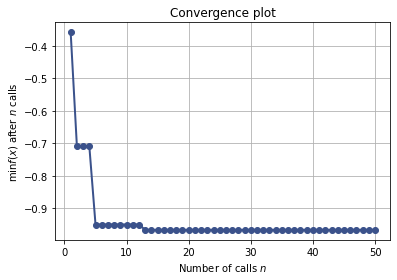

In [49]:
print("Best score=%.4f" % res_gp_rf.fun)
print("""Best parameters:
n_estimators=%d
max_depth=%d
min_samples_leaf=%d
min_samples_split=%d
""" % (res_gp_rf.x[0], res_gp_rf.x[1],res_gp_rf.x[2], res_gp_rf.x[3]))
plot_convergence(res_gp_rf)

In [59]:
rfc = RandomForestClassifier(n_estimators=res_gp_rf.x[0],
                            max_depth=res_gp_rf.x[1],
                            min_samples_leaf=res_gp_rf.x[2],
                            min_samples_split=res_gp_rf.x[3])
rfc.fit(xtrn, ytrn)
rfcCV = cross_validate(rfc, xtrn, ytrn,cv=2,scoring=("accuracy"), return_train_score=True)


In [60]:
rfcCV

{'fit_time': array([0.11985826, 0.11743021]),
 'score_time': array([0.00925016, 0.00901294]),
 'test_score': array([0.96666667, 0.91666667]),
 'train_score': array([1.        , 0.98333333])}

In [61]:
rfc.score(xtrn, ytrn)

0.975

In [62]:
rfc.score(xtst, ytst)

0.36666666666666664

# hyperopt wrapper

In [74]:
from sklearn.datasets import load_digits
from sklearn.svm import SVC

X, y = load_digits(n_class=10, return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=.25, random_state=0)

# log-uniform: understand as search over p = exp(x) by varying x
opt = BayesSearchCV(
    SVC(),
    {
        'C': (1e-6, 1e+6, 'log-uniform'),
        'gamma': (1e-6, 1e+1, 'log-uniform'),
        'degree': (1, 8),  # integer valued parameter
        'kernel': ['linear', 'poly', 'rbf'],  # categorical parameter
    },
    n_iter=32,
    cv=3
)

opt.fit(X_train, y_train)

print("val. score: %s" % opt.best_score_)
print("test score: %s" % opt.score(X_test, y_test))

val. score: 0.985894580549369
test score: 0.9822222222222222


In [169]:
rcf = RandomForestClassifier()

In [173]:
ytrn

array([1, 0, 1, 2, 1, 2, 0, 1, 0, 1, 1, 1, 0, 2, 0, 1, 2, 0, 0, 2, 2, 1,
       0, 2, 1, 1, 2, 0, 0, 0, 1, 0, 2, 2, 2, 0, 1, 1, 0, 0, 2, 0, 2, 1,
       2, 1, 2, 0, 1, 0, 2, 2, 0, 2, 1, 0, 0, 0, 1, 0, 0, 1, 0, 2, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 2, 1, 0, 2, 0, 0, 1, 0, 2, 2, 0, 2, 1, 1, 2,
       2, 2, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 0, 2, 0, 1, 1, 2, 1, 0, 1, 0,
       2, 1, 1, 2, 0, 2, 0, 2, 0, 1])

In [170]:
opt = BayesSearchCV(
    rcf,
    {  "n_estimators":(10, 500),
    'max_depth':(10, 100),
    'min_samples_leaf':(1, 100),
    'min_samples_split':(2, 25),
    'max_features':['auto', 'sqrt', 'log2']
    },
    n_iter=32,
    cv=3
)

opt.fit(xtrn, ytrn)

print("val. score: %s" % opt.best_score_)
print("test score: %s" % opt.score(xtst, ytst))

/home/alex/.local/lib/python3.6/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


val. score: 0.9666666666666667
test score: 0.9333333333333333


In [174]:
def bayes_opt(self):
        opt = BayesSearchCV(self.model, self.space, self.n_iter, self.cv)
        print(self.x)
        print(self.y)
        print(type(self.x))
        print(type(self.y))
        print(self.space)
        opt.fit(self.x, self.y)
        return opt


In [171]:
xtrn

array([[5. , 2.3, 3.3, 1. ],
       [5.5, 4.2, 1.4, 0.2],
       [5.4, 3. , 4.5, 1.5],
       [6.3, 3.3, 6. , 2.5],
       [6.3, 2.5, 4.9, 1.5],
       [6.3, 2.8, 5.1, 1.5],
       [5. , 3.5, 1.3, 0.3],
       [6.1, 2.9, 4.7, 1.4],
       [5.1, 3.8, 1.5, 0.3],
       [6.1, 2.8, 4. , 1.3],
       [5.9, 3. , 4.2, 1.5],
       [5.6, 2.5, 3.9, 1.1],
       [5.4, 3.9, 1.3, 0.4],
       [6.3, 2.7, 4.9, 1.8],
       [4.6, 3.4, 1.4, 0.3],
       [5.7, 2.9, 4.2, 1.3],
       [5.8, 2.8, 5.1, 2.4],
       [4.6, 3.1, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [6. , 2.2, 5. , 1.5],
       [6.5, 3.2, 5.1, 2. ],
       [5.6, 3. , 4.5, 1.5],
       [5.4, 3.9, 1.7, 0.4],
       [7.2, 3.2, 6. , 1.8],
       [5.8, 2.7, 4.1, 1. ],
       [6.9, 3.1, 4.9, 1.5],
       [6.3, 2.5, 5. , 1.9],
       [4.4, 3.2, 1.3, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.5, 2.3, 1.3, 0.3],
       [6.2, 2.2, 4.5, 1.5],
       [4.3, 3. , 1.1, 0.1],
       [6.1, 2.6, 5.6, 1.4],
       [7.7, 3. , 6.1, 2.3],
       [5.8, 2

In [77]:
print("test score: %s" % opt.score(xtst, ytst))

test score: 0.9333333333333333


In [84]:
opt.best_params_

OrderedDict([('max_depth', 10),
             ('max_features', 'sqrt'),
             ('min_samples_leaf', 5),
             ('min_samples_split', 25),
             ('n_estimators', 10)])

# genetic algorithm

In [13]:
function_inputs = [30,50,50,35]

In [14]:
rfc = RandomForestClassifier(n_estimators=function_inputs[0],
                            max_depth=function_inputs[1],
                            min_samples_leaf=function_inputs[2],
                            min_samples_split=function_inputs[3])
rfc.fit(xtrn, ytrn)
rfcCV = cross_validate(rfc, xtrn, ytrn,cv=5,scoring=("accuracy"))


In [15]:
rfcCV

{'fit_time': array([0.04146934, 0.03998661, 0.04066086, 0.04123807, 0.0403893 ]),
 'score_time': array([0.00410771, 0.00341964, 0.00332999, 0.00336933, 0.00347114]),
 'test_score': array([0.33333333, 0.33333333, 0.375     , 0.375     , 0.375     ])}

In [31]:
def fitness_func(solution, solution_idx):
    rfc = RandomForestClassifier(n_estimators=int(solution[0]),
                                max_depth=int(solution[1]),
                                min_samples_leaf=int(solution[2]),
                                min_samples_split=int(solution[3]))
    rfc.fit(xtrn, ytrn)
    rfcCV = cross_validate(rfc, xtrn, ytrn,cv=5,scoring="accuracy")
    fitness = rfcCV['test_score'].mean()
    return fitness

In [128]:
rfc = RandomForestClassifier(n_estimators=int(solution[0]),
                                max_depth=int(solution[1]),
                                min_samples_leaf=int(solution[2]),
                                min_samples_split=int(solution[3]),
                                 oob_score=True)
rfc.fit(xtrn, ytrn)

RandomForestClassifier(max_depth=51, min_samples_leaf=3, min_samples_split=17,
                       n_estimators=296, oob_score=True)

In [101]:
rfc.fit(xtrn, ytrn)

RandomForestClassifier(max_depth=51, min_samples_leaf=3, min_samples_split=17,
                       n_estimators=296, oob_score=True)

In [102]:
rfc.score(xtrn, ytrn)

0.9833333333333333

In [108]:
np.mean([1,23,321.5,2])

86.875

In [129]:
rfc.oob_score_

0.9666666666666667

In [33]:
fitness_function = fitness_func

gene_type = int

gene_space = [[10,400], [1,100], [1,25], [2,50]]
gene_space = [range(10,400), range(1,100), range(1,25), range(2,50)]

sol_per_pop = 4
num_genes = len(gene_space)

num_generations = 10
num_parents_mating = 3

parent_selection_type = "sss"
keep_parents = 1

crossover_type = "single_point"

mutation_type = "random"
mutation_percent_genes = 20

In [34]:
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       gene_space=gene_space,
                       mutation_percent_genes=mutation_percent_genes)

In [35]:
ga_instance.run()

In [36]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))

Parameters of the best solution : [296.  51.   3.  17.]
Fitness value of the best solution = 0.975


In [82]:
rfc = RandomForestClassifier(n_estimators=int(solution[0]),
                            max_depth=int(solution[1]),
                            min_samples_leaf=int(solution[2]),
                            min_samples_split=int(solution[3]))
rfc.fit(xtrn, ytrn)
rfcCV = cross_validate(rfc, xtrn, ytrn,cv=5,scoring=("accuracy"))

In [83]:
print("train score: %s" % rfc.score(xtrn, ytrn))
print("test score: %s" % rfc.score(xtst, ytst))

train score: 0.9833333333333333
test score: 0.9333333333333333


In [92]:
type(rfc).__name__

'RandomForestClassifier'

# in class

In [125]:
class Tuner():
    def __init__(__self__):
        pass
    
    @staticmethod
    def calssfitness_func(solution, solution_idx):
        rfc = RandomForestClassifier(n_estimators=int(solution[0]),
                                    max_depth=int(solution[1]),
                                    min_samples_leaf=int(solution[2]),
                                    min_samples_split=int(solution[3]))
        rfc.fit(xtrn, ytrn)
        rfcCV = cross_validate(rfc, xtrn, ytrn,cv=5,scoring="accuracy")
        fitness = rfcCV['test_score'].mean()
        return fitness
    
    def choose(self):
        return Tuner.calssfitness_func
    
    def tune(self):
        ff = self.choose()
        fitness_function = ff
        gene_type = int

        gene_space = [(10,400), [1,100], [1,25], [2,50]]
        gene_space = [range(10,400), range(1,100), range(1,25), range(2,50)]

        sol_per_pop = 4
        num_genes = len(gene_space)

        num_generations = 10
        num_parents_mating = 3

        parent_selection_type = "sss"
        keep_parents = 1

        crossover_type = "single_point"

        mutation_type = "random"
        mutation_percent_genes = 20
        
        ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       gene_space=gene_space,
                       mutation_percent_genes=mutation_percent_genes)
        ga_instance.run()
        solution, solution_fitness, solution_idx = ga_instance.best_solution()
        print("Parameters of the best solution : {solution}".format(solution=solution))
        print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
        
        return ga_instance
        
    

In [126]:
t = Tuner()
t.tune()

Parameters of the best solution : [200.  68.   1.   7.]
Fitness value of the best solution = 0.9666666666666668
